# GRIP: The Sparks Foundation- Data Science and Buisness Analytics Internship

# Task 1: Prediction Using Supervised Machine Learning .

## Author : Rutuja Shete

**PROBLEM STATEMENT :**
* In this task we are going to predict the percentage of an student based upon the no. of hours he studied. we re going to use simple linear regression in this task as it involves only two variables .
* Dataset :http://bit.ly/w-data

## Step 1:   Import all the recquired libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Step 2 : Import Dataset

In [93]:
data = pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


* As per the simple linear regression is concern, is depend upon the two variables dependant and independant. so, here we can say that according to our problem statement "Hours" is the Independant variable / predictor(X) & "Score" is the Dependent variable / Target(Y).

## Step 3: Exploratory Data Analysis

* Get usefull insights from a dataset.

In [8]:
# observe the dataset
print("Rows:",data.shape[0])
print("Columns:",data.shape[1])

Rows: 25
Columns: 2


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


* The info function gives the quick idea about dataset. here, the information contains no. of columns, column labels, column data types, null values,etc.  

In [10]:
#Summary of statistics
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [16]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

* There is no null value in dataset.

## Step 4 :  Visualizing The Data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


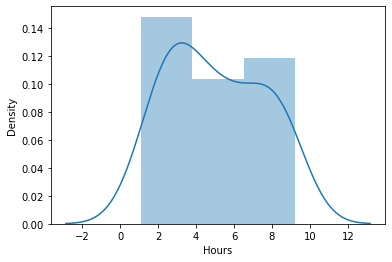

In [11]:
# Univariate Analysis
# Checking the overall distributions of both the columns.
sns_plt = sns.distplot(data["Hours"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


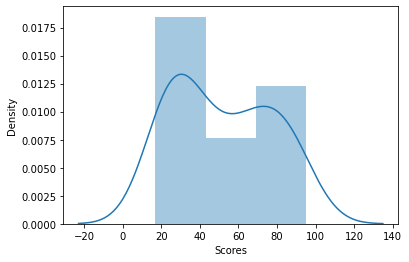

In [19]:
sns_plt1= sns.distplot(data["Scores"])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


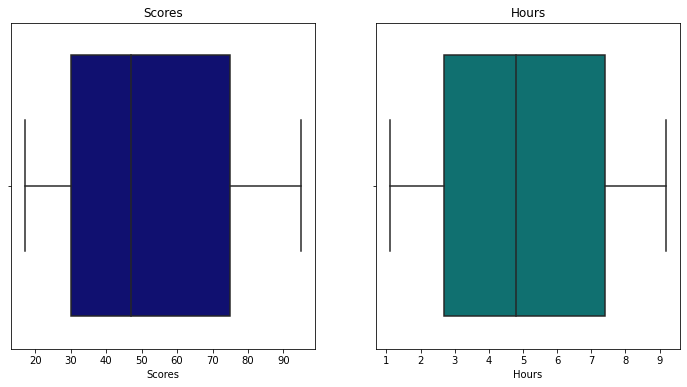

In [31]:
# To check the outliers by using multivariate analysis
fig=plt.figure(figsize=(12,6))
a= fig.add_subplot(1,2,1, title="Scores")
b= fig.add_subplot(1,2,2, title="Hours")

sns.boxplot(data.Scores, ax=a, color="NAVY")
sns.boxplot(data.Hours, ax=b, color="TEAL")
plt.show()


* There are no outliers in the data.

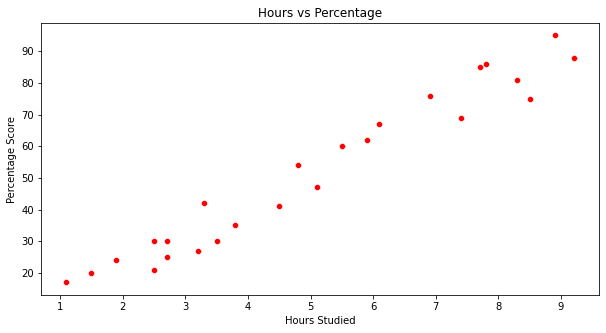

In [26]:
# To check the relationship between "Hours" and "Scores."
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x='Hours',y='Scores',color="red")
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

* There is a strong positive relationship between the Hours studied and the percentage score.
* As the value of hours increases the percentage also increases .

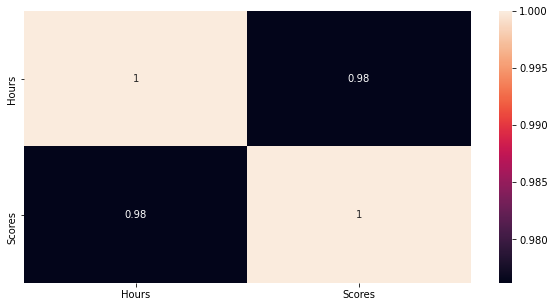

In [28]:
# also check the strength of relationship.
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

 * Both the feature are highly correlated to each other

## Step 5:  Simple Linear Regression

### Model Building

* Lets divide the data into  "attributes" (inputs) and "labels" (outputs).
* Assign "Hours" as X/ Predictor/ Independent variable
* Assign "Scores" as Y/Target/Dependent variable.

In [34]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

### Train-Test Split

* Now the next step is to split the data into training and testing stess.
* We'll do this by using Scikit-Learn's built-in train_test_split() method.
* we split it our data into 80:20 ratio. this is standard split rate

In [94]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45) 

In [95]:
# Check the shape of train and test dataset.
print(x_train.shape)
print(y_train.shape)

(20, 1)
(20,)


In [96]:
print(x_test.shape)
print(y_test.shape)

(5, 1)
(5,)


### Applying the Linear Regression Model

In [97]:
from sklearn.linear_model import LinearRegression
Regression = LinearRegression()



In [98]:
# fit the training data
Regression.fit(x_train,y_train)
print("Training Complete")

Training Complete


In [99]:
Regression.intercept_ # B0 VALUE

0.5033079222218575

In [100]:
Regression.coef_

array([9.9434127])

In [101]:
# Plotting the regression line
line = Regression.coef_*x+Regression.intercept_

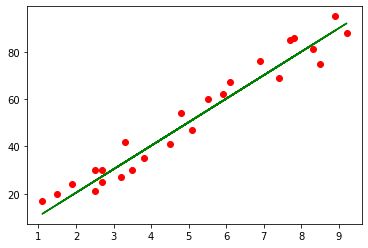

In [102]:
# Plotting for the test data
plt.scatter(x,y,color="red")
plt.plot(x, line,color="green");
plt.show()


### Checking accuracy score of both Traing & Testing sets.

In [103]:
print("Training Score: ",Regression.score(x_train,y_train)*100)
print("Testing Score: ",Regression.score(x_test,y_test)*100)

Training Score:  95.37693888812633
Testing Score:  92.35792627359558


### Making the predictions

* As we have fitted a regression line on our train dataset.It's time to make some predictions on the test dataset. for this, we first need to add a constant to the x_test data like we did for x_train and then we can simply go on and predict the y values corresponding to x_test using the predict attribute of the fitted regression line.

In [104]:
print("y_test: ",y_test)
print("\nx_test: ")
print(x_test)

y_test:  [30 30 42 85 24]

x_test: 
[[2.5]
 [2.7]
 [3.3]
 [7.7]
 [1.9]]


In [105]:
# Prediction on testing data
y_pred = Regression.predict(x_test) # predicted value of x_test
print("y_pred :")
print(y_pred)

y_pred :
[25.36183967 27.35052222 33.31656984 77.06758572 19.39579205]


In [106]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,30,25.361840
1,30,27.350522
2,42,33.316570
3,85,77.067586
4,24,19.395792


### What will be the predicted score if a student study for 9.25 hrs in a day?

In [107]:
hours = 9.25
pred = Regression.predict([[hours]])
print("No. of study hours: {}".format(hours))
print("Predicted Score: {}".format(pred[0]))

No. of study hours: 9.25
Predicted Score: 92.47987540719345


## Step 6: Evaluating the Model

* The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [108]:
from sklearn import metrics 

#### Mean Absolute Error

In [109]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.701538099875744


#### Mean Squared Error

In [111]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error: 37.61123005187202


In [113]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

6.132799528100688


## Conclusion :


* After successfully analyzing and exploring dataset we can successfully predict the score of a student based upon the no of hours he studied in a day. 

# Thank You